# **KAYAK**

#### Get top 35 cities to visit https://one-week-in.com/35-cities-to-visit-in-france/

In [13]:
!pip install lxml
!pip install html5lib

In [1]:
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
import requests
import json
import lxml
import urllib.parse

import plotly.express as px
import plotly.graph_objects as go

In [2]:
url = 'https://one-week-in.com/35-cities-to-visit-in-france/'
r = requests.get(url)
r

<Response [200]>

In [3]:
soup = BeautifulSoup(r.text, 'lxml')

In [4]:
# Find all cities
cities = soup.find_all('div', 'entry-content body-color clearfix link-color-wrap')

# Get only first item that is a list of href with the city names we need
cities = soup.select('ol')[:1]
cities

[<ol>
 <li><a href="#montsaintmichel">Mont Saint Michel</a></li>
 <li><a href="#stmalo">St Malo</a></li>
 <li><a href="#bayeux">Bayeux</a></li>
 <li><a href="#lehavre">Le Havre</a></li>
 <li><a href="#rouen">Rouen</a></li>
 <li><a href="#paris">Paris</a></li>
 <li><a href="#amiens">Amiens</a></li>
 <li><a href="#lille">Lille</a></li>
 <li><a href="#strasbourg">Strasbourg</a></li>
 <li><a href="#chateauduhautkoenigsbourg">Chateau du Haut Koenigsbourg</a></li>
 <li><a href="#colmar">Colmar</a></li>
 <li><a href="#eguisheim">Eguisheim</a></li>
 <li><a href="#besancon">Besancon</a></li>
 <li><a href="#dijon">Dijon</a></li>
 <li><a href="#annecy">Annecy</a></li>
 <li><a href="#grenoble">Grenoble</a></li>
 <li><a href="#lyon">Lyon</a></li>
 <li><a href="#verdongorge">Verdon Gorge</a></li>
 <li><a href="#bormeslesmimosas">Bormes les Mimosas</a></li>
 <li><a href="#cassis">Cassis</a></li>
 <li><a href="#marseille">Marseille</a></li>
 <li><a href="#aixenprovence">Aix en Provence</a></li>
 <li><

In [5]:
print('Collecting city names...\n')

all_cities = []

for i in range(len(cities)):
    cities_string = cities[i].get_text()
    cities = cities_string.split('\n') # Remove \n from each city names

    all_cities.append(cities) # put it into a list

print(all_cities,'\n')

print('...Extract list and remove first and last empty items...\n')
print('...Done !\n')

all_cities = all_cities[0][1:-1] # Get rid of first and last empty items
print(all_cities)




# DataFrame
df = pd.DataFrame({'id' : [i+1 for i in range(len(all_cities))],
                   'city': all_cities,})


[['', 'Mont Saint Michel', 'St Malo', 'Bayeux', 'Le Havre', 'Rouen', 'Paris', 'Amiens', 'Lille', 'Strasbourg', 'Chateau du Haut Koenigsbourg', 'Colmar', 'Eguisheim', 'Besancon', 'Dijon', 'Annecy', 'Grenoble', 'Lyon', 'Verdon Gorge', 'Bormes les Mimosas', 'Cassis', 'Marseille', 'Aix en Provence', 'Avignon', 'Uzès', 'Nímes', 'Aigues Mortes', 'Saintes Maries de la mer', 'Collioure', 'Carcassonne', 'Ariege', 'Toulouse', 'Montauban', 'Biarritz', 'Bayonne', 'La Rochelle', '']] 

...Extract list and remove first and last empty items...

...Done !

['Mont Saint Michel', 'St Malo', 'Bayeux', 'Le Havre', 'Rouen', 'Paris', 'Amiens', 'Lille', 'Strasbourg', 'Chateau du Haut Koenigsbourg', 'Colmar', 'Eguisheim', 'Besancon', 'Dijon', 'Annecy', 'Grenoble', 'Lyon', 'Verdon Gorge', 'Bormes les Mimosas', 'Cassis', 'Marseille', 'Aix en Provence', 'Avignon', 'Uzès', 'Nímes', 'Aigues Mortes', 'Saintes Maries de la mer', 'Collioure', 'Carcassonne', 'Ariege', 'Toulouse', 'Montauban', 'Biarritz', 'Bayonne', '

## Weather

#### Get latitude and longitude

In [6]:
url_city = [i.replace(" ","+").lower() for i in all_cities]

print(f'Cities to add to url :\n\n{url_city}')

Cities to add to url :

['mont+saint+michel', 'st+malo', 'bayeux', 'le+havre', 'rouen', 'paris', 'amiens', 'lille', 'strasbourg', 'chateau+du+haut+koenigsbourg', 'colmar', 'eguisheim', 'besancon', 'dijon', 'annecy', 'grenoble', 'lyon', 'verdon+gorge', 'bormes+les+mimosas', 'cassis', 'marseille', 'aix+en+provence', 'avignon', 'uzès', 'nímes', 'aigues+mortes', 'saintes+maries+de+la+mer', 'collioure', 'carcassonne', 'ariege', 'toulouse', 'montauban', 'biarritz', 'bayonne', 'la+rochelle']


In [7]:
print('Collecting geolocalisation data...\n')

# Latitude list
lat = []
# Longitude list
long = []

# Get latitude and longitude for each city in the dataset
for city in url_city:
    search_city = requests.get(f"https://nominatim.openstreetmap.org/search.php?q={city}&format=jsonv2").json()[0]
    city_lat = str(search_city['lat'])
    city_lon = str(search_city['lon'])
    
    try:
    # Put latitude and longitude to list
        lat.append(city_lat)
        long.append(city_lon)

        print(f"{city} : OK")
    
    except:
        # Add NaN value if latitude or longitude are not found
        lat.append(np.nan)
        long.append(np.nan)
        
        print(f"Couldn't find results for {city}")
        
print('...Done\n')
print(f'Latitude list :{lat}\n')
print(f'Longitude list :{long}')


mont+saint+michel : OK
st+malo : OK
bayeux : OK
le+havre : OK
rouen : OK
paris : OK
amiens : OK
lille : OK
strasbourg : OK
chateau+du+haut+koenigsbourg : OK
colmar : OK
eguisheim : OK
besancon : OK
dijon : OK
annecy : OK
grenoble : OK
lyon : OK
verdon+gorge : OK
bormes+les+mimosas : OK
cassis : OK
marseille : OK
aix+en+provence : OK
avignon : OK
uzès : OK
nímes : OK
aigues+mortes : OK
saintes+maries+de+la+mer : OK
collioure : OK
carcassonne : OK
ariege : OK
toulouse : OK
montauban : OK
biarritz : OK
bayonne : OK
la+rochelle : OK
...Done

Latitude list :['48.6359541', '48.649518', '49.2764624', '49.4938975', '49.4404591', '48.8588897', '49.8941708', '50.6365654', '48.584614', '48.249489800000006', '48.0777517', '48.0447968', '47.2380222', '47.3215806', '45.8992348', '45.1875602', '45.7578137', '43.7496562', '43.1572172', '43.2140359', '43.2961743', '43.5298424', '43.9492493', '44.0121279', '43.8374249', '43.5658225', '43.4522771', '42.52505', '43.2130358', '42.9455368', '43.6044622', '

In [8]:
# We are aware that temperature values are Kelvin, we need to convert them all to celcius values

# So we build a function that we will apply later on our several lists of Kelvin values
def k_to_celcius(list_to_convert):
    celcius_values = []
    
    for kelvin in list_to_convert:
        try:
            celcius_values.append(round(kelvin-273.15))
        # We don't want our loop to be stopped by a nan value, so it'll just pass
        except:
            pass
    
    list_to_convert = celcius_values
    
    return list_to_convert


# Function that we will apply later on our list of m/s values
def ms_to_kmh(list_to_convert):
    kmh_values = []
    
    for ms in list_to_convert:
        try:
            kmh_values.append(round(ms*3.6))
        # We don't want our loop to be stopped by a nan value so it'll just pass
        except:
            pass
    
    list_to_convert = kmh_values
    
    return list_to_convert

In [9]:
print('Collecting weather data...\n')

# All weather info we are going to collect
min_temp_list = []
max_temp_list = []
morning_temp_list = []
evening_temp_list = []
day_temp_list = []
night_temp_list = []
weather_list = []
wind_speed_list1 = []

# Get all weather info we need from latitude and longitude of each city
for i, j, k in zip(lat, long, all_cities):
    base_url = "https://api.openweathermap.org/data/2.5/onecall?lat="
    latitude = i
    longitude = j
    API_key = "0383a2e5cfd1d890894f542e3c83dd9a"
    day_forecast_nb = 15

    # upadting the URL
    url = base_url + latitude + "&lon=" + longitude + f"&cnt={day_forecast_nb}&appid=" + API_key 
    # HTTP request
    response = requests.get(url).json()
   
    # Temperature
    temp = response['daily'][0]['temp']
    min_temp = temp['min']
    max_temp = temp['max']
    morning_temp = temp['morn']
    evening_temp = temp['eve']
    day_temp = temp['day']
    night_temp = temp['night']
    
    # Weather info (if sunny, cloudy...)
    weather = response['daily'][0]['weather'][0]['main']
    # Wind speed
    wind_speed = response['daily'][0]['wind_speed']
    
    try:
        # Put resulut in lists we created before
        min_temp_list.append(min_temp)
        max_temp_list.append(max_temp)
        morning_temp_list.append(morning_temp)
        evening_temp_list.append(evening_temp)
        day_temp_list.append(day_temp)
        night_temp_list.append(night_temp)
        
        # Weather info (if sunny, cloudy...)
        weather_list.append(weather)
        
        # Wind speed
        wind_speed_list1.append(wind_speed)
        
        print(f"{k} : OK")
    

    except:
        # Add NaN value if latitude or longitude are not found
        min_temp_list.append(np.nan)
        max_temp_list.append(np.nan)
        morning_temp_list.append(np.nan)
        evening_temp_list.append(np.nan)
        day_temp_list.append(np.nan)
        night_temp_list.append(np.nan)
        weather_list.append(np.nan)
        wind_speed_list.append(np.nan)
        
        
        print(f"Couldn't find any result for city : {k}")

print('\n...Done!')


Mont Saint Michel : OK
St Malo : OK
Bayeux : OK
Le Havre : OK
Rouen : OK
Paris : OK
Amiens : OK
Lille : OK
Strasbourg : OK
Chateau du Haut Koenigsbourg : OK
Colmar : OK
Eguisheim : OK
Besancon : OK
Dijon : OK
Annecy : OK
Grenoble : OK
Lyon : OK
Verdon Gorge : OK
Bormes les Mimosas : OK
Cassis : OK
Marseille : OK
Aix en Provence : OK
Avignon : OK
Uzès : OK
Nímes : OK
Aigues Mortes : OK
Saintes Maries de la mer : OK
Collioure : OK
Carcassonne : OK
Ariege : OK
Toulouse : OK
Montauban : OK
Biarritz : OK
Bayonne : OK
La Rochelle : OK

...Done!


In [10]:
#We apply our functions while using DataFrame method

data = {'id' : [i+1 for i in range(len(all_cities))],
        'city': all_cities,
        'latitude': lat,
        'longitude':long,
        'min_temp': k_to_celcius(min_temp_list),
        'max_temp': k_to_celcius(max_temp_list),
        'morning_temp' : k_to_celcius(morning_temp_list),
        'evening_temp' : k_to_celcius(evening_temp_list),
        'day_temp' : k_to_celcius(day_temp_list),
        'night_temp' : k_to_celcius(night_temp_list),
        #'wind_speed' : ms_to_kmh(wind_speed_list1),
        'weather' : weather_list
                  }

df = pd.DataFrame(data)
                  
df.head()

,id,city,latitude,longitude,min_temp,max_temp,morning_temp,evening_temp,day_temp,night_temp,weather
0,1,Mont Saint Michel,48.6359541,-1.511459954959514,9,16,13,14,16,10,Rain
1,2,St Malo,48.649518,-2.0260409,10,15,13,14,15,12,Rain
2,3,Bayeux,49.2764624,-0.7024738,9,17,11,15,14,9,Rain
3,4,Le Havre,49.4938975,0.1079732,11,15,13,14,14,12,Rain
4,5,Rouen,49.4404591,1.0939658,9,16,11,15,15,9,Rain


In [11]:
#Saving result in a .csv file
df.to_csv("city_weather.csv")

## Weather Map

In [12]:
df = pd.read_csv("city_weather.csv")
df.head()

,Unnamed: 0,id,city,latitude,longitude,min_temp,max_temp,morning_temp,evening_temp,day_temp,night_temp,weather
0,0,1,Mont Saint Michel,48.635954,-1.511460,9,16,13,14,16,10,Rain
1,1,2,St Malo,48.649518,-2.026041,10,15,13,14,15,12,Rain
2,2,3,Bayeux,49.276462,-0.702474,9,17,11,15,14,9,Rain
3,3,4,Le Havre,49.493898,0.107973,11,15,13,14,14,12,Rain
4,4,5,Rouen,49.440459,1.093966,9,16,11,15,15,9,Rain


In [13]:
df = df.drop(columns=df.columns[0])

In [14]:
df.day_temp.mean()

17.514285714285716

In [59]:
def temp_scale(color_scale):
    
    # Parameters 
    avg_temp = df.day_temp.mean()
    very_hot = 25 > avg_temp
    hot =  18 < avg_temp < 23
    sweet = 13 < avg_temp < 18
    cold =  8 < avg_temp < 13

    # Set different temperature color scale with parameters
    if very_hot:
        color_scale = ['orange',
                       'red']  
    elif hot:
        color_scale = ['yellow',
                       'orange',
                       'red']
    elif sweet:
        color_scale = ['blue',
                       'yellow'] 
    elif cold:
        color_scale = ['darkblue',
                       'blue',
                       'yellow']
    else:
        color_scale = ['darkblue',
                       'blue']
        
    return color_scale

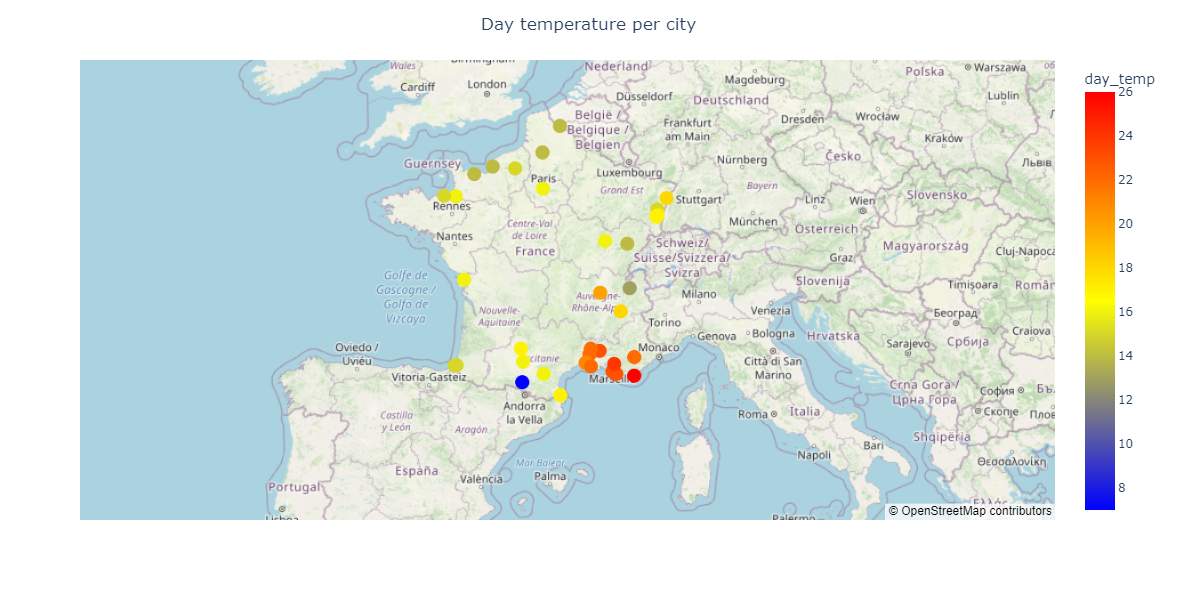

In [64]:
mapbox_access_token = 'pk.eyJ1IjoibGV3aXN3ZXJuZWNrIiwiYSI6ImNsMnMzYnA1OTA5dXgza25yazhhajh3NGsifQ.Z3CrpQqY0Xj_ZH3spiAiYQ'

# Defaut color_scale before function
color_scale = None

# Plotting map 
fig = px.scatter_mapbox(
    df,
    lat=df['latitude'].astype(float),
    lon=df['longitude'].astype(float),
    #text=[str(i) for i in df["day_temp"]],
    size='day_temp',
    hover_name = 'city',
    hover_data = df[["day_temp", "min_temp", "max_temp"]],
    height=600,
    color='day_temp',
    zoom=4,
    #opacity = 0.7,
    color_continuous_scale =  ["blue", "yellow", "red"] # Applying our color scale function
) 

fig.update_layout(
    title="Day temperature per city",
    title_x=.5,
    mapbox_style='open-street-map',
    mapbox=dict(accesstoken=mapbox_access_token)
)

fig.update_traces(marker_size=15, selector=dict(type='scattermapbox'))

fig.show()

### **Hotels**

In [ ]:
# Preparing our lists for data collection

In [17]:
url_city_list

['mont+saint+michel',
 'st+malo',
 'bayeux',
 'le+havre',
 'rouen',
 'paris',
 'amiens',
 'lille',
 'strasbourg',
 'chateau+du+haut+koenigsbourg',
 'colmar',
 'eguisheim',
 'besancon',
 'dijon',
 'annecy',
 'grenoble',
 'lyon',
 'verdon+gorge',
 'bormes+les+mimosas',
 'cassis',
 'marseille',
 'aix+en+provence',
 'avignon',
 'uzès',
 'nímes',
 'aigues+mortes',
 'saintes+maries+de+la+mer',
 'collioure',
 'carcassonne',
 'ariege',
 'toulouse',
 'montauban',
 'biarritz',
 'bayonne',
 'la+rochelle']

In [58]:
print('Collecting data for our future hotel selection...')
print()

hotels = []
links = []
scores = []
description = []

for city in range(len(url_city_list)):
    # Choose group size
    group_adults=2
    group_children=0
    no_rooms=1

    # Choose date
    checkin_year = 2022
    checkin_month=7
    checkin_monthday=15
    checkout_year=2022
    checkout_month=7
    checkout_monthday=31
    
    # URL
    base_url = "https://www.booking.com/searchresults.fr.html?label=gen173nr-1DCAEoggI46AdIDVgEaE2IAQGYAQ24ARfIAQzYAQPoAQH4AQKIAgGoAgO4Au2w9pEGwAIB0gIkN2Y5OGE1YTYtNzdiYS00ZWExLTg1OWMtZWU5YmUzODY0ODlh2AIE4AIB&sid=e34035080d52b7754f93e2aaf0123b4c&aid=304142&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Fhotel%2Findex.fr.html%3Faid%3D304142%3Blabel%3Dgen173nr-1DCAEoggI46AdIDVgEaE2IAQGYAQ24ARfIAQzYAQPoAQH4AQKIAgGoAgO4Au2w9pEGwAIB0gIkN2Y5OGE1YTYtNzdiYS00ZWExLTg1OWMtZWU5YmUzODY0ODlh2AIE4AIB%3Bsid%3De34035080d52b7754f93e2aaf0123b4c%3Bsrpvid%3D276e4b1235230191%26%3B&ss="
    city = f"{url_city_list[city]}%2C+France&is_ski_area=&"
    date = f"checkin_year={checkin_year}&checkin_month={checkin_month}&checkin_monthday={checkin_monthday}&checkout_year={checkout_year}&checkout_month={checkout_month}&checkout_monthday={checkout_monthday}"
    nb_of_people = f"&group_adults={group_adults}&group_children={group_children}&no_rooms={no_rooms}&"
    filters = "b_h4u_keep_filters=&from_sf=1&ss_raw=&order=class"
    
    # Soup
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    url = base_url + city + date + nb_of_people + filters
    r = requests.get(url, headers=headers)
    soup = BeautifulSoup(r.text, 'lxml')
    
    # Get hotel names
    try: 
        search_hotel = soup.find_all('div', 'fcab3ed991 a23c043802')
        hotels.append([i.get_text() for i in search_hotel][:20])
    except:
        hotels.append(np.nan)
   
    # Get hotel url
    try:
        search_link = soup.find_all('a', "e13098a59f")
        links.append([i.get('href') for i in search_link][:20])
    except:
        links[0].append(np.nan) 
  
    # Get scores
    try:
        search_score = soup.find_all('div', "b5cd09854e d10a6220b4")
        scores.append([float(i.get_text().replace(",", ".")) for i in search_score][:20])
    except:
        scores[0].append(np.nan)
    
    # Get description
    try:
        desc = soup.find_all('span', 'df597226dd')
        description.append([i.get_text() for i in desc][:20])
    except:
        description[0].append(np.nan)


print('...Done!\n')
print(f'Display first 5 items about hotels from city {url_city_list[0]}:\n')
print(f"Hotel names : {hotels[0][0:5]}\n")
print(f"URLs : {links[0][0:5]}\n")
print(f"Scores : {scores[0][0:5]}\n")
print(f"Description : {description[0][0:5]}")


...Done!

Display first 5 items about hotels from city mont+saint+michel:

Hotel names : ['Le Mouton Blanc', 'Les Terrasses Poulard', 'Auberge Saint Pierre', 'Hotel Gabriel', 'Maison de 2 chambres avec piscine partagee jardin clos et wifi a Pontorson']

URLs : ['https://www.booking.com/hotel/fr/le-mouton-blanc-le-mont-saint-michel.fr.html?label=gen173nr-1DCAEoggI46AdIDVgEaE2IAQGYAQ24ARfIAQzYAQPoAQH4AQKIAgGoAgO4Au2w9pEGwAIB0gIkN2Y5OGE1YTYtNzdiYS00ZWExLTg1OWMtZWU5YmUzODY0ODlh2AIE4AIB&sid=e34035080d52b7754f93e2aaf0123b4c&aid=304142&ucfs=1&arphpl=1&checkin=2022-07-15&checkout=2022-07-31&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=1&hapos=1&sr_order=class&srpvid=483d86be06560197&srepoch=1648667389&all_sr_blocks=19204916_347524665_0_17_0&highlighted_blocks=19204916_347524665_0_17_0&matching_block_id=19204916_347524665_0_17_0&sr_pri_blocks=19204916_347524665_0_17_0__339744&from=searchresults#hotelTmpl', 'https://www.booking.com/hotel/fr/les-terrasses-poulard.f

In [59]:
# Since we could  get less than 20 result per page for some reason , we need to check for our length lists before append to DataFrame

# Build a function to fill missing list items by NaN value where its needed
def fill_nan(list_name):
    for i in list_name:
        if len(i) < 20:
            list_name = [i + [np.nan] * (20 - len(i)) for i in list_name]
        else:
            pass
    return list_name

In [60]:
# Check for our length lists before append to DataFrame, if len < 20, our function fill_nan() will be apllied

print('Checking lists length...\n')

for i, j, k, l in zip(hotels, links, scores, description):
    
    # Check in hotel list
    if (len(i) < 20):
        print(f'Empty value in hotel list : {len(i)} out of 20')
        hotels = (hotels)
        print(f'-> Filled with {20 - len(i)} NaN\n')
    else:
        pass
   
    # Check in url list
    if (len(j) < 20):
        print(f'Empty value in links list : {len(j)} out of 20')
        links = fill_nan(links)
        print(f'-> Filled with {20 - len(j)} NaN\n')
    else:
        pass
        
    # Check in scores list
    if (len(k) < 20):
        print(f'Empty value in scores list : {len(k)} out of 20')
        scores = fill_nan(scores)
        print(f'-> Filled with {20 - len(k)} NaN\n')
    else:
        pass
        
     # Check in description list
    if (len(l) < 20):
        print(f'Empty value in description list : {len(l)} out of 20')
        description = fill_nan(description)
        print(f'-> Filled with {20 - len(l)} NaN\n')
    else:
        pass


print('\n...Done')

Checking lists length...

Empty value in scores list : 16 out of 20
-> Filled with 4 NaN

Empty value in scores list : 18 out of 20
-> Filled with 2 NaN

Empty value in scores list : 19 out of 20
-> Filled with 1 NaN

Empty value in scores list : 19 out of 20
-> Filled with 1 NaN

Empty value in scores list : 19 out of 20
-> Filled with 1 NaN

Empty value in scores list : 16 out of 20
-> Filled with 4 NaN


...Done


In [174]:
data = {'city' : df['city'],
        'id' : df['id'],
        'hotels' : hotels,
        'score' : scores,
        'url' : links,
        'description' : description}

df_hotels = pd.DataFrame(data)
df_hotels.head()

,city,id,hotels,score,url,description
0,Mont Saint Michel,1,"[Le Mouton Blanc, Les Terrasses Poulard, Auber...","[7.2, 7.3, 8.1, 8.0, 9.2, 8.4, 8.3, 8.0, 9.1, ...",[https://www.booking.com/hotel/fr/le-mouton-bl...,"[Chambre Double - Annexe, Chambre Double ou Li..."
1,St Malo,2,"[Grand Hôtel Des Thermes, Château Hôtel Du Col...","[8.0, 8.9, 8.4, 9.1, 8.9, 8.7, 8.9, 8.8, 9.4, ...",[https://www.booking.com/hotel/fr/desthermessa...,"[Chambre Double Classique - Vue sur Ville, Cha..."
2,Bayeux,3,"[Villa Lara Hotel, Au Loup Historic Apartments...","[9.7, 8.6, 8.4, 8.8, 9.1, 8.4, 8.6, 8.7, 8.2, ...",[https://www.booking.com/hotel/fr/villa-lara-h...,"[Chambre Exécutive, Studio Lit Queen-Size , Ap..."
3,Le Havre,4,"[Hotel Spa Le Pasino, Mercure Le Havre Centre ...","[8.4, 7.6, 8.1, 8.5, 8.6, 7.5, 7.4, 7.3, 8.2, ...",[https://www.booking.com/hotel/fr/pasino.fr.ht...,"[Chambre Double Confort, Chambre Lits Jumeaux ..."
4,Rouen,5,"[Hôtel de Bourgtheroulde, Autograph Collection...","[8.5, 8.9, 8.7, 7.9, 8.2, 8.6, 7.9, 7.1, 8.2, ...",[https://www.booking.com/hotel/fr/de-bourgther...,[Grande Chambre avec Lit Double – Vue Limitée ...


In [176]:
# Flatten all lists in rows
df_hotels = df_hotels.explode(['hotels', 'score', 'url', 'description']).reset_index(drop=True)
df_hotels.head()

,city,id,hotels,score,url,description
0,Mont Saint Michel,1,Le Mouton Blanc,7.2,https://www.booking.com/hotel/fr/le-mouton-bla...,Chambre Double - Annexe
1,Mont Saint Michel,1,Les Terrasses Poulard,7.3,https://www.booking.com/hotel/fr/les-terrasses...,Chambre Double ou Lits Jumeaux - Bâtiment Prin...
2,Mont Saint Michel,1,Auberge Saint Pierre,8.1,https://www.booking.com/hotel/fr/auberge-saint...,Chambre Lits Jumeaux
3,Mont Saint Michel,1,Hotel Gabriel,8.0,https://www.booking.com/hotel/fr/hotel-gabriel...,Chambre Quadruple avec Mezzanine
4,Mont Saint Michel,1,Maison de 2 chambres avec piscine partagee jar...,9.2,https://www.booking.com/hotel/fr/maison-de-2-c...,Maison de Vacances 2 Chambres


In [68]:
address = []

print('Collecting addresses...')
print()

for i in range(len(df_hotels)):
    reponse = requests.get(df_hotels['url'][i])
    soup1 = BeautifulSoup(reponse.text, 'lxml')
    search_adress = soup1.find_all('span', 'hp_address_subtitle js-hp_address_subtitle jq_tooltip')
    adress_text = search_adress[0].get_text().replace("\n", "")
    
    try:
        address.append(adress_text)
        print(f"URL {df_hotels.index[i] + 1} / {len(df_hotels)} : OK")
    except:
        address.append(np.nan)
        print(f"Couldn't find any result for {df_hotels['city'][i]}, {df_hotels.index[i]}")

print()
print('...Done !')    


URL 1 / 700 : OK
URL 2 / 700 : OK
URL 3 / 700 : OK
URL 4 / 700 : OK
URL 5 / 700 : OK
URL 6 / 700 : OK
URL 7 / 700 : OK
URL 8 / 700 : OK
URL 9 / 700 : OK
URL 10 / 700 : OK
URL 11 / 700 : OK
URL 12 / 700 : OK
URL 13 / 700 : OK
URL 14 / 700 : OK
URL 15 / 700 : OK
URL 16 / 700 : OK
URL 17 / 700 : OK
URL 18 / 700 : OK
URL 19 / 700 : OK
URL 20 / 700 : OK
URL 21 / 700 : OK
URL 22 / 700 : OK
URL 23 / 700 : OK
URL 24 / 700 : OK
URL 25 / 700 : OK
URL 26 / 700 : OK
URL 27 / 700 : OK
URL 28 / 700 : OK
URL 29 / 700 : OK
URL 30 / 700 : OK
URL 31 / 700 : OK
URL 32 / 700 : OK
URL 33 / 700 : OK
URL 34 / 700 : OK
URL 35 / 700 : OK
URL 36 / 700 : OK
URL 37 / 700 : OK
URL 38 / 700 : OK
URL 39 / 700 : OK
URL 40 / 700 : OK
URL 41 / 700 : OK
URL 42 / 700 : OK
URL 43 / 700 : OK
URL 44 / 700 : OK
URL 45 / 700 : OK
URL 46 / 700 : OK
URL 47 / 700 : OK
URL 48 / 700 : OK
URL 49 / 700 : OK
URL 50 / 700 : OK
URL 51 / 700 : OK
URL 52 / 700 : OK
URL 53 / 700 : OK
URL 54 / 700 : OK
URL 55 / 700 : OK
URL 56 / 700 : OK


In [69]:
df_hotels['address'] = address
df_hotels.head()

,city,id,hotels,score,url,description,address
0,Mont Saint Michel,1,Le Mouton Blanc,7.2,https://www.booking.com/hotel/fr/le-mouton-bla...,Chambre Double - Annexe,"Grande Rue , 50170 Le Mont-Saint-Michel, France"
1,Mont Saint Michel,1,Les Terrasses Poulard,7.3,https://www.booking.com/hotel/fr/les-terrasses...,Chambre Double ou Lits Jumeaux - Bâtiment Prin...,"Grande Rue, 50170 Le Mont-Saint-Michel, France"
2,Mont Saint Michel,1,Auberge Saint Pierre,8.1,https://www.booking.com/hotel/fr/auberge-saint...,Chambre Lits Jumeaux,"Grande Rue, 50170 Le Mont-Saint-Michel, France"
3,Mont Saint Michel,1,Hotel Gabriel,8.0,https://www.booking.com/hotel/fr/hotel-gabriel...,Chambre Quadruple avec Mezzanine,"Route du Mont Saint Michel, 50170 Le Mont-Sain..."
4,Mont Saint Michel,1,Maison de 2 chambres avec piscine partagee jar...,9.2,https://www.booking.com/hotel/fr/maison-de-2-c...,Maison de Vacances 2 Chambres,"7 Boulevard Clemenceau , 50170 Pontorson, France"


In [20]:
#reponse = requests.get(links[0][11])


#soup1 = BeautifulSoup(reponse.text, 'lxml')

#lat = soup1.find_all('script')

#latitude = lat[49].get_text()
#latitude = latitude.split()[3]
#latitude = latitude.replace(";", "")

#longitude = lat[49].get_text()
#longitude = longitude.split()[6]
#longitude = longitude.replace(";", "")

#print('latitude :', latitude)
#print('longitude :', longitude)


In [70]:
print('Collecting geolocalisation data...\n')

lat = []
long = []
count = 0

for i in range(len(address)):

    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address[i]) +'?format=json'
    response = requests.get(url).json()
    
    try:
        lat.append(response[0]["lat"])
        long.append(response[0]["lon"])
        count+=1
        print(f'Address {count} / {len(address)}: OK')
        
    except:
        lat.append(np.nan)
        long.append(np.nan)
        count+=1
        print(f"Address {count} / {len(address)} : couldn't find result -> adding NaN instead")
               
print('\n...Done !')


Address 1 / 700: OK
Address 2 / 700: OK
Address 3 / 700: OK
Address 4 / 700 : couldn't find result -> adding NaN instead
Address 5 / 700: OK
Address 6 / 700 : couldn't find result -> adding NaN instead
Address 7 / 700: OK
Address 8 / 700 : couldn't find result -> adding NaN instead
Address 9 / 700: OK
Address 10 / 700: OK
Address 11 / 700: OK
Address 12 / 700: OK
Address 13 / 700: OK
Address 14 / 700: OK
Address 15 / 700: OK
Address 16 / 700 : couldn't find result -> adding NaN instead
Address 17 / 700: OK
Address 18 / 700: OK
Address 19 / 700 : couldn't find result -> adding NaN instead
Address 20 / 700 : couldn't find result -> adding NaN instead
Address 21 / 700: OK
Address 22 / 700 : couldn't find result -> adding NaN instead
Address 23 / 700: OK
Address 24 / 700: OK
Address 25 / 700 : couldn't find result -> adding NaN instead
Address 26 / 700: OK
Address 27 / 700: OK
Address 28 / 700 : couldn't find result -> adding NaN instead
Address 29 / 700: OK
Address 30 / 700 : couldn't fi

In [71]:
df_hotels['latitude'] = lat
df_hotels['longitude'] = long
df_hotels.head()

,city,id,hotels,score,url,description,address,latitude,longitude
0,Mont Saint Michel,1,Le Mouton Blanc,7.2,https://www.booking.com/hotel/fr/le-mouton-bla...,Chambre Double - Annexe,"Grande Rue , 50170 Le Mont-Saint-Michel, France",48.6366347,-1.5107312
1,Mont Saint Michel,1,Les Terrasses Poulard,7.3,https://www.booking.com/hotel/fr/les-terrasses...,Chambre Double ou Lits Jumeaux - Bâtiment Prin...,"Grande Rue, 50170 Le Mont-Saint-Michel, France",48.6366347,-1.5107312
2,Mont Saint Michel,1,Auberge Saint Pierre,8.1,https://www.booking.com/hotel/fr/auberge-saint...,Chambre Lits Jumeaux,"Grande Rue, 50170 Le Mont-Saint-Michel, France",48.6366347,-1.5107312
3,Mont Saint Michel,1,Hotel Gabriel,8.0,https://www.booking.com/hotel/fr/hotel-gabriel...,Chambre Quadruple avec Mezzanine,"Route du Mont Saint Michel, 50170 Le Mont-Sain...",NaN,NaN
4,Mont Saint Michel,1,Maison de 2 chambres avec piscine partagee jar...,9.2,https://www.booking.com/hotel/fr/maison-de-2-c...,Maison de Vacances 2 Chambres,"7 Boulevard Clemenceau , 50170 Pontorson, France",48.552287,-1.5090957


In [72]:
df_hotels.to_csv("kayak.csv")

In [65]:
df = pd.read_csv("kayak.csv")
df.head()

,Unnamed: 0,city,id,hotels,score,url,description,address,latitude,longitude
0,0,Mont Saint Michel,1,Le Mouton Blanc,7.2,https://www.booking.com/hotel/fr/le-mouton-bla...,Chambre Double - Annexe,"Grande Rue , 50170 Le Mont-Saint-Michel, France",48.636635,-1.510731
1,1,Mont Saint Michel,1,Les Terrasses Poulard,7.3,https://www.booking.com/hotel/fr/les-terrasses...,Chambre Double ou Lits Jumeaux - Bâtiment Prin...,"Grande Rue, 50170 Le Mont-Saint-Michel, France",48.636635,-1.510731
2,2,Mont Saint Michel,1,Auberge Saint Pierre,8.1,https://www.booking.com/hotel/fr/auberge-saint...,Chambre Lits Jumeaux,"Grande Rue, 50170 Le Mont-Saint-Michel, France",48.636635,-1.510731
3,3,Mont Saint Michel,1,Hotel Gabriel,8.0,https://www.booking.com/hotel/fr/hotel-gabriel...,Chambre Quadruple avec Mezzanine,"Route du Mont Saint Michel, 50170 Le Mont-Sain...",NaN,NaN
4,4,Mont Saint Michel,1,Maison de 2 chambres avec piscine partagee jar...,9.2,https://www.booking.com/hotel/fr/maison-de-2-c...,Maison de Vacances 2 Chambres,"7 Boulevard Clemenceau , 50170 Pontorson, France",48.552287,-1.509096


In [ ]:
df['city'].unique()

array(['Mont Saint Michel', 'St Malo', 'Bayeux', 'Le Havre', 'Rouen',
       'Paris', 'Amiens', 'Lille', 'Strasbourg',
       'Chateau du Haut Koenigsbourg', 'Colmar', 'Eguisheim', 'Besancon',
       'Dijon', 'Annecy', 'Grenoble', 'Lyon', 'Verdon Gorge',
       'Bormes les Mimosas', 'Cassis', 'Marseille', 'Aix en Provence',
       'Avignon', 'Uzès', 'Nímes', 'Aigues Mortes',
       'Saintes Maries de la mer', 'Collioure', 'Carcassonne', 'Ariege',
       'Toulouse', 'Montauban', 'Biarritz', 'Bayonne', 'La Rochelle'],
      dtype=object)

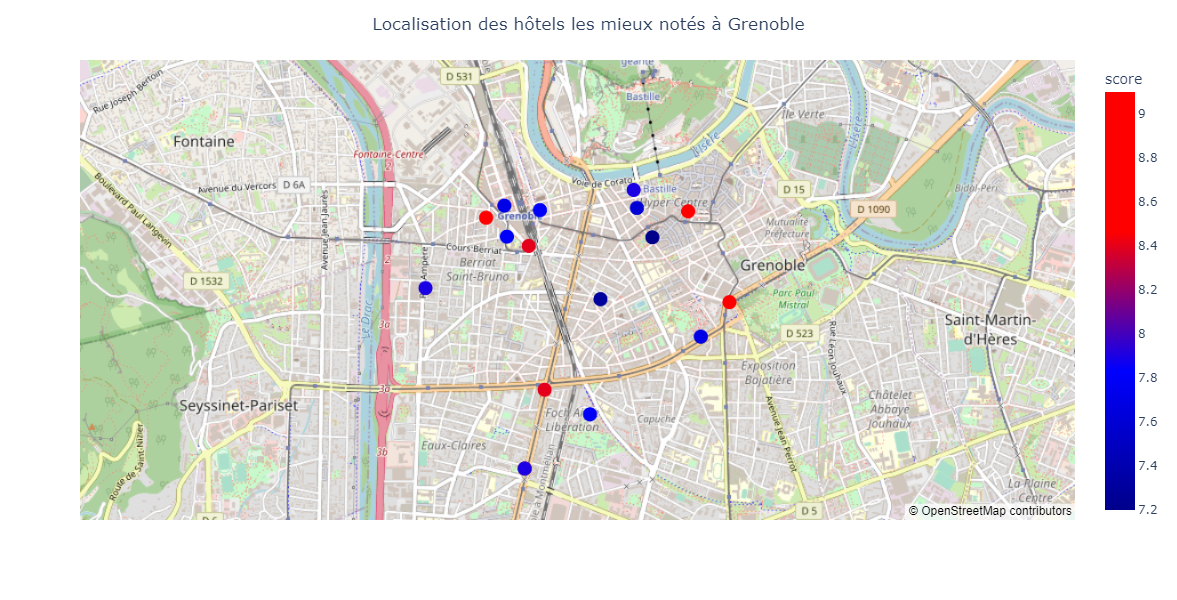

In [77]:
mapbox_access_token = 'pk.eyJ1IjoibGV3aXN3ZXJuZWNrIiwiYSI6ImNsMnMzYnA1OTA5dXgza25yazhhajh3NGsifQ.Z3CrpQqY0Xj_ZH3spiAiYQ'
city = "Grenoble"
    
# Plotting map 
fig = px.scatter_mapbox(
    df[df["city"] == city],
    lat='latitude',
    lon='longitude',
    hover_name = 'hotels',
    hover_data = None,
    height=600,
    width=900,
    color='score',
    zoom=13,
    color_continuous_scale =  ['darkblue','blue','red', 'red']
) 

fig.update_layout(
    title=f"Localisation des hôtels les mieux notés à {city}",
    title_x=.5,
    mapbox_style='open-street-map',
    mapbox=dict(accesstoken=mapbox_access_token)
)

fig.update_traces(marker_size=15, selector=dict(type='scattermapbox'))

fig.show()